In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
print("GPU is available:", tf.config.list_physical_devices('GPU'))


GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# # CPU Optimizations 
# tf.config.experimental.set_virtual_device_configuration(
#     tf.config.experimental.list_physical_devices("CPU")[0],
#     [tf.config.experimental.VirtualDeviceConfiguration()],
# )

 # GPU Memory Limit Optimization
tf.config.set_logical_device_configuration(
     tf.config.list_physical_devices("GPU")[0],
     [tf.config.LogicalDeviceConfiguration(memory_limit=5899)],
)

Load Dataset yang ingin digunakan

In [4]:
# Step 1: Memasukkan Data set
data = pd.read_csv('Shark_Comparison_Dataset.csv')

In [5]:
print(data.columns)

Index(['Species', 'Average_Length_m', 'Maximum_Length_m', 'Average_Weight_kg',
       'Maximum_Weight_kg', 'Lifespan_years', 'Swimming_Speed_kmh',
       'Bite_Force_N', 'Gestation_Period_months', 'Number_of_Teeth',
       'Diet_kg_per_week'],
      dtype='object')


Proses Pre-Processing Data

In [6]:
# Step 2: Encode label (Species)
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])  

In [7]:
# Step 2: Split data into features (X) and target (y)
X = data.drop(columns='Species')
y = data['Species']

In [8]:
# Step 2: Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=300 / len(X), random_state=69)

In [9]:
# step 2: Normalisasikan
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 2: Convert target to categorical format for binary classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Pembuatan Model

Epoch 1/30
41/43 [===========================>..] - ETA: 0s - loss: 1.0289 - accuracy: 0.3773
Epoch 1 Weights:
Layer: Hidden_Layer_1
Weights:
[[ 3.47583264e-01 -1.92994669e-01 -1.80968016e-01 -2.38597184e-01
   1.40137672e-01  3.23493361e-01  1.25255615e-01 -3.23758304e-01
   1.89115822e-01  2.03543335e-01  3.49634886e-02  1.18971743e-01
  -1.18342355e-01 -4.44826931e-02 -2.37201408e-01  1.39675066e-01
  -2.48006150e-01  1.14344195e-01  5.01565672e-02 -8.56956467e-02
  -3.33798856e-01  3.05063963e-01  1.01674423e-01 -2.76883155e-01
  -7.34796226e-02 -6.01330362e-02 -8.03714618e-02  1.29705951e-01
   1.07265264e-01 -2.77944565e-01  1.05229817e-01 -1.39623180e-01
  -2.44930848e-01 -2.86224425e-01 -3.40080559e-02 -1.82842344e-01]
 [ 1.05860397e-01 -2.64772385e-01 -3.08042198e-01  1.57011122e-01
  -5.29208481e-02  3.15219998e-01 -2.63547391e-01 -2.27804810e-01
   2.72838145e-01  3.46084982e-01  2.61368584e-02  7.46827722e-02
   2.53553361e-01  9.92650539e-02  2.25906953e-01  3.02772403e-01

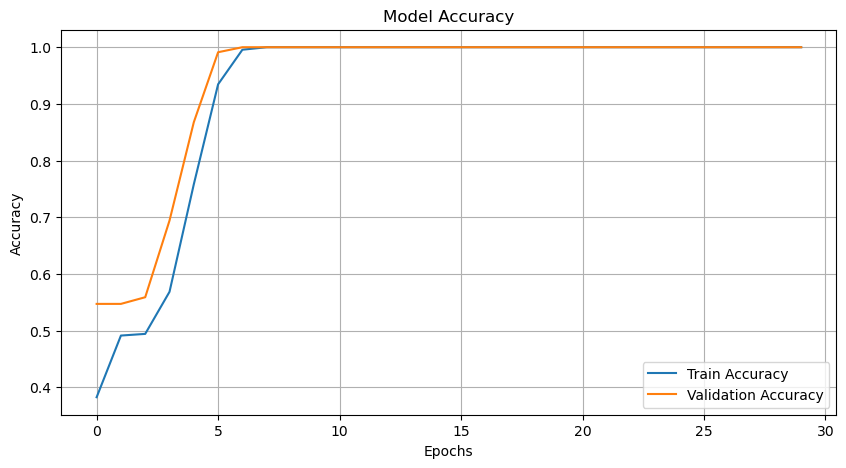

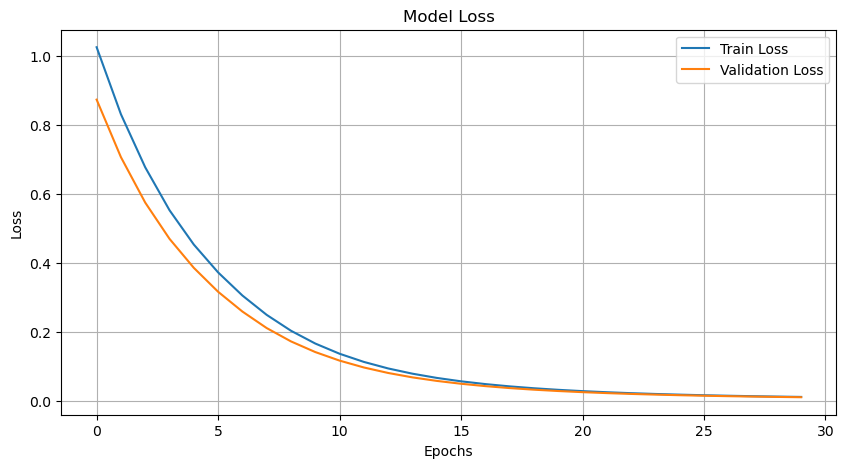

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback


# Step 5: Membuat Model MLP
model = Sequential([
    Dense(36, input_dim=X_train.shape[1], activation='relu', name='Hidden_Layer_1'),
    Dense(24, activation='relu', name='Hidden_Layer_2'),
    Dense(2, activation='softmax', name='Output_Layer')
])

# Step 5: Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Membuat Callback agar bisa melihat Weight setiap epoch
class WeightLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1} Weights:")
        for layer in self.model.layers:
            if hasattr(layer, 'weights') and len(layer.weights) > 0:
                weights, biases = layer.get_weights()
                print(f"Layer: {layer.name}")
                print(f"Weights:\n{weights}")
                print(f"Biases:\n{biases}\n")

# Tambahkan callback ke dalam proses fitting
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[WeightLogger()],
    verbose=1
)

# Step 6: Visualize Training History
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()
plt.show()


In [12]:
# Memberikan Summary dari proses fitting
model.summary(), history.history



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 36)                396       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 24)                888       
                                                                 
 Output_Layer (Dense)        (None, 2)                 50        
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


(None,
 {'loss': [1.0242581367492676,
   0.8299548029899597,
   0.6761271953582764,
   0.55169677734375,
   0.4521631896495819,
   0.3714107871055603,
   0.3044367730617523,
   0.2483043670654297,
   0.20227178931236267,
   0.16519653797149658,
   0.13561689853668213,
   0.11191794276237488,
   0.09296459704637527,
   0.07779156416654587,
   0.06556186825037003,
   0.05567092448472977,
   0.047632958739995956,
   0.04101435840129852,
   0.035551439970731735,
   0.031010141596198082,
   0.027212027460336685,
   0.024013113230466843,
   0.021303514018654823,
   0.018990956246852875,
   0.01702309586107731,
   0.015312516130506992,
   0.013835064135491848,
   0.012539170682430267,
   0.011409693397581577,
   0.010415196418762207],
  'accuracy': [0.38235294818878174,
   0.49117645621299744,
   0.4941176474094391,
   0.5683823823928833,
   0.758088231086731,
   0.9345588088035583,
   0.9955882430076599,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,


Evaluasi Model

In [13]:
# Step 7: Mengetes Model menggunakan data test
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)  # Jika model output-nya probabilitas

# Jika y_test dalam format one-hot encoded, ambil argmax untuk label yang diprediksi
y_test_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predicted_classes, axis=1)

# Hitung akurasi
correct_predictions = np.sum(predicted_labels == y_test_labels)
accuracy = correct_predictions / len(y_test) * 100

print(f"Number of correct predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

10/10 [==============================] - 0s 946us/step
Number of correct predictions: 300
Accuracy: 100.00%


In [14]:
# Step 7: Evaluasi Model
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.00974260363727808, 1.0]


10/10 [==============================] - 0s 1ms/step


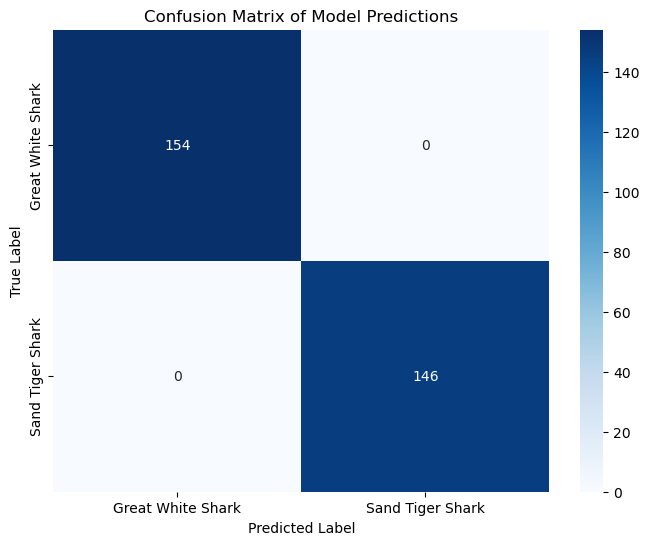

In [15]:
# Menggunakan Confusion Matrix untuk membaca hasil

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Get true labels
true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix of Model Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()